In [236]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [237]:
df = df.drop_duplicates()
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-13 00:01:00,40.7075,-73.9483,B02512
1,2014-04-13 00:02:00,40.7305,-73.9892,B02512
2,2014-04-13 00:03:00,40.7197,-74.0066,B02512
3,2014-04-13 00:03:00,40.7639,-73.9761,B02512
4,2014-04-13 00:03:00,40.7260,-73.9895,B02512


In [238]:
df = df.dropna()  # it Cleanly removes any row with NULL
df

,Date/Time,Lat,Lon,Base
0,2014-04-13 00:01:00,40.7075,-73.9483,B02512
1,2014-04-13 00:02:00,40.7305,-73.9892,B02512
2,2014-04-13 00:03:00,40.7197,-74.0066,B02512
3,2014-04-13 00:03:00,40.7639,-73.9761,B02512
4,2014-04-13 00:03:00,40.7260,-73.9895,B02512
...,...,...,...,...
19699,2014-04-30 23:40:00,40.7672,-73.9702,B02512
19700,2014-04-30 23:44:00,40.7270,-73.9803,B02512
19701,2014-04-30 23:47:00,40.6906,-73.9582,B02512
19702,2014-04-30 23:47:00,40.7737,-73.8717,B02512


In [239]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce', dayfirst=True)
df

,Date/Time,Lat,Lon,Base
0,2014-04-13 00:01:00,40.7075,-73.9483,B02512
1,2014-04-13 00:02:00,40.7305,-73.9892,B02512
2,2014-04-13 00:03:00,40.7197,-74.0066,B02512
3,2014-04-13 00:03:00,40.7639,-73.9761,B02512
4,2014-04-13 00:03:00,40.7260,-73.9895,B02512
...,...,...,...,...
19699,2014-04-30 23:40:00,40.7672,-73.9702,B02512
19700,2014-04-30 23:44:00,40.7270,-73.9803,B02512
19701,2014-04-30 23:47:00,40.6906,-73.9582,B02512
19702,2014-04-30 23:47:00,40.7737,-73.8717,B02512


In [240]:
df = df[df['Date/Time'].notnull()]

In [241]:
df = df.reset_index(drop=True)
df

,Date/Time,Lat,Lon,Base
0,2014-04-13 00:01:00,40.7075,-73.9483,B02512
1,2014-04-13 00:02:00,40.7305,-73.9892,B02512
2,2014-04-13 00:03:00,40.7197,-74.0066,B02512
3,2014-04-13 00:03:00,40.7639,-73.9761,B02512
4,2014-04-13 00:03:00,40.7260,-73.9895,B02512
...,...,...,...,...
19699,2014-04-30 23:40:00,40.7672,-73.9702,B02512
19700,2014-04-30 23:44:00,40.7270,-73.9803,B02512
19701,2014-04-30 23:47:00,40.6906,-73.9582,B02512
19702,2014-04-30 23:47:00,40.7737,-73.8717,B02512


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19704 entries, 0 to 19703
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date/Time  19704 non-null  datetime64[ns]
 1   Lat        19704 non-null  float64       
 2   Lon        19704 non-null  float64       
 3   Base       19704 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 615.9+ KB


In [243]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-13 00:01:00,40.7075,-73.9483,B02512
1,2014-04-13 00:02:00,40.7305,-73.9892,B02512
2,2014-04-13 00:03:00,40.7197,-74.0066,B02512
3,2014-04-13 00:03:00,40.7639,-73.9761,B02512
4,2014-04-13 00:03:00,40.7260,-73.9895,B02512


In [244]:
df_cleaned = df.copy()

In [245]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19704 entries, 0 to 19703
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date/Time  19704 non-null  datetime64[ns]
 1   Lat        19704 non-null  float64       
 2   Lon        19704 non-null  float64       
 3   Base       19704 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 615.9+ KB


In [246]:
df_cleaned.describe()

,Date/Time,Lat,Lon
count,19704,19704.000000,19704.000000
mean,2014-04-22 23:25:53.900730880,40.745254,-73.980491
min,2014-04-13 00:01:00,40.440500,-74.555600
25%,2014-04-17 20:32:45,40.727175,-73.999500
50%,2014-04-23 17:25:00,40.748100,-73.985000
75%,2014-04-27 13:18:45,40.763800,-73.971175
max,2014-04-30 23:59:00,41.373000,-72.923700
std,NaN,0.035619,0.056891


In [247]:
df_cleaned.head()

,Date/Time,Lat,Lon,Base
0,2014-04-13 00:01:00,40.7075,-73.9483,B02512
1,2014-04-13 00:02:00,40.7305,-73.9892,B02512
2,2014-04-13 00:03:00,40.7197,-74.0066,B02512
3,2014-04-13 00:03:00,40.7639,-73.9761,B02512
4,2014-04-13 00:03:00,40.7260,-73.9895,B02512


In [248]:
df_cleaned.tail()

,Date/Time,Lat,Lon,Base
19699,2014-04-30 23:40:00,40.7672,-73.9702,B02512
19700,2014-04-30 23:44:00,40.7270,-73.9803,B02512
19701,2014-04-30 23:47:00,40.6906,-73.9582,B02512
19702,2014-04-30 23:47:00,40.7737,-73.8717,B02512
19703,2014-04-30 23:59:00,40.8660,-73.9278,B02512


In [249]:
sns.set(style="darkgrid")

In [250]:
df_cleaned['Hour'] = df_cleaned['Date/Time'].dt.hour # Extract hour from Date/Time column

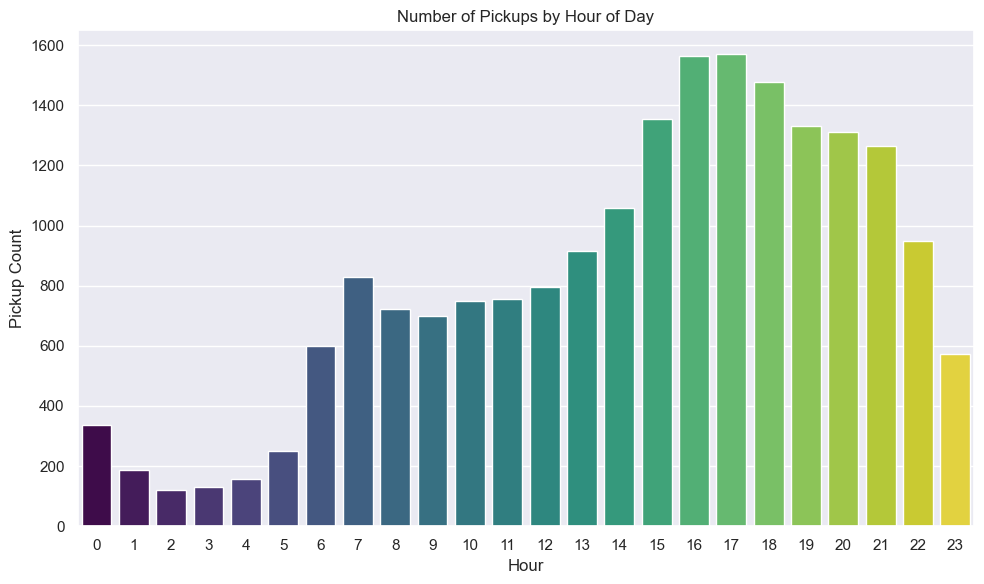

In [251]:
# Distribution of Pickups by Hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df_cleaned, hue='Hour', palette='viridis', legend=False)
plt.title('Number of Pickups by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Pickup Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [252]:
# Make sure Date/Time is in datetime format first
df_cleaned['Date/Time'] = pd.to_datetime(df_cleaned['Date/Time'], errors='coerce')

# Now extract Weekday
df_cleaned['Weekday'] = df_cleaned['Date/Time'].dt.day_name()

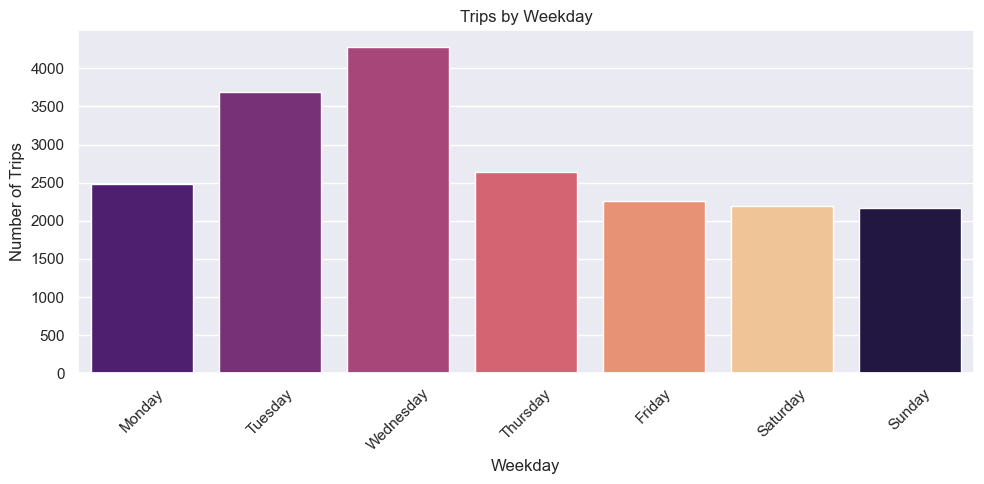

In [253]:
# Plotting Trips by Weekday
plt.figure(figsize=(10, 5))
sns.countplot(
    x='Weekday',
    hue='Weekday',  # Assign x to hue
    data=df_cleaned,
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette='magma',
    legend=False    # Hide the duplicate legend
)
plt.title("Trips by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [254]:
# By creatig a pivot table with Rows = Weekdays, Columns = Hours, Values = Trip Counts
heatmap_data = df_cleaned.pivot_table(index='Weekday', columns='Hour', values='Base', aggfunc='count')

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

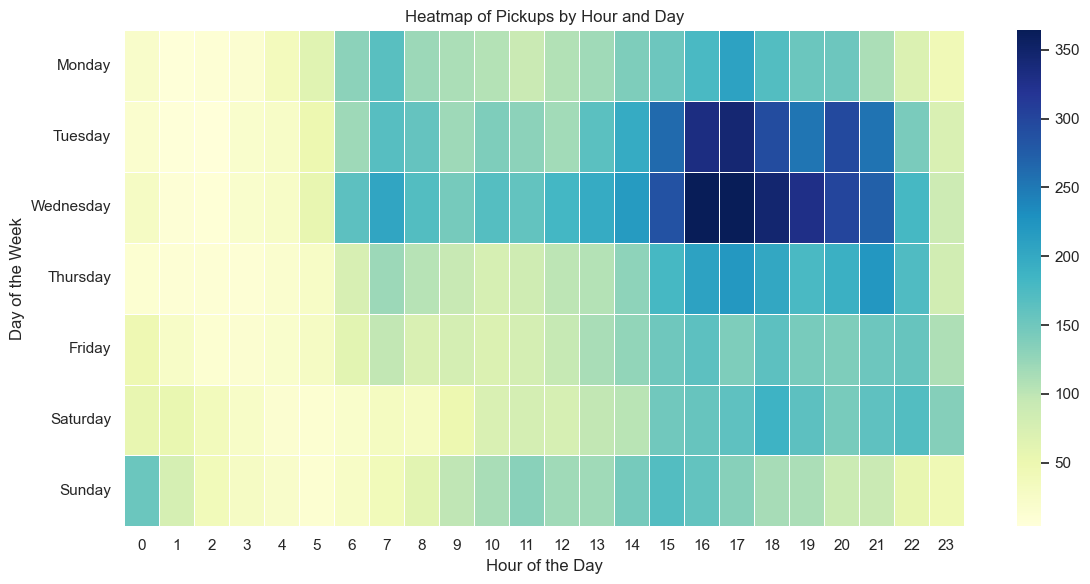

In [255]:
# Heatmap of Pickups by Hour and Day
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title("Heatmap of Pickups by Hour and Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.tight_layout()
plt.show()

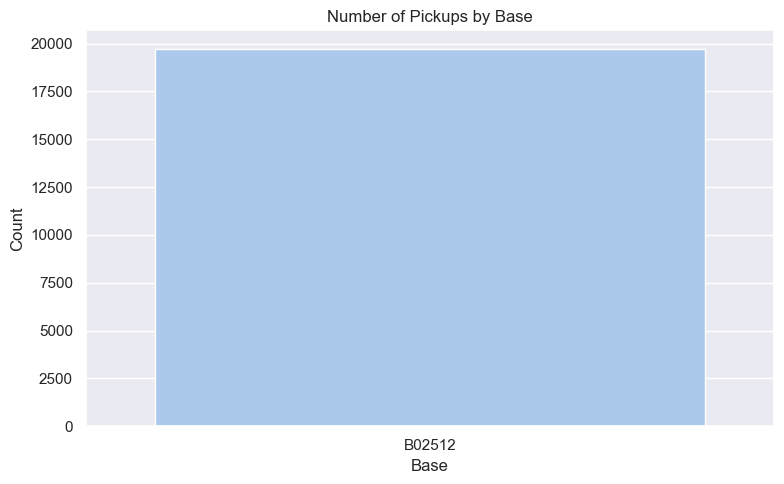

In [256]:
# Countplot of pickups by Base
plt.figure(figsize=(8, 5))
sns.countplot(x='Base', data=df_cleaned, hue='Base', palette='pastel', legend=False)
plt.title("Number of Pickups by Base")
plt.xlabel("Base")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

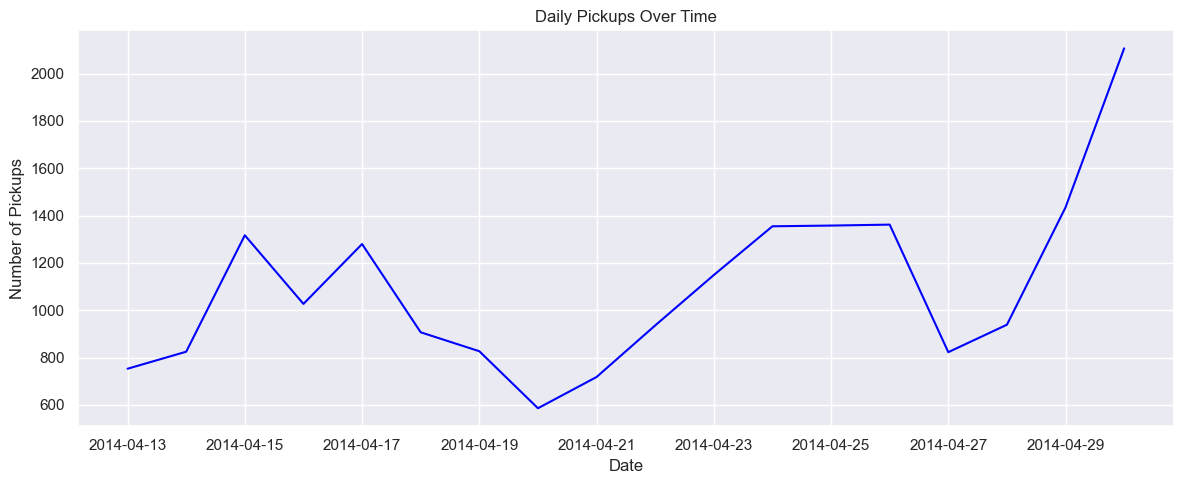

In [257]:
# Line Plot of Daily Pickups
daily_pickups = df_cleaned.groupby(df_cleaned['Date/Time'].dt.date).size()

plt.figure(figsize=(12, 5))
daily_pickups.plot(kind='line', color='blue')
plt.title("Daily Pickups Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Pickups")
plt.tight_layout()
plt.show()

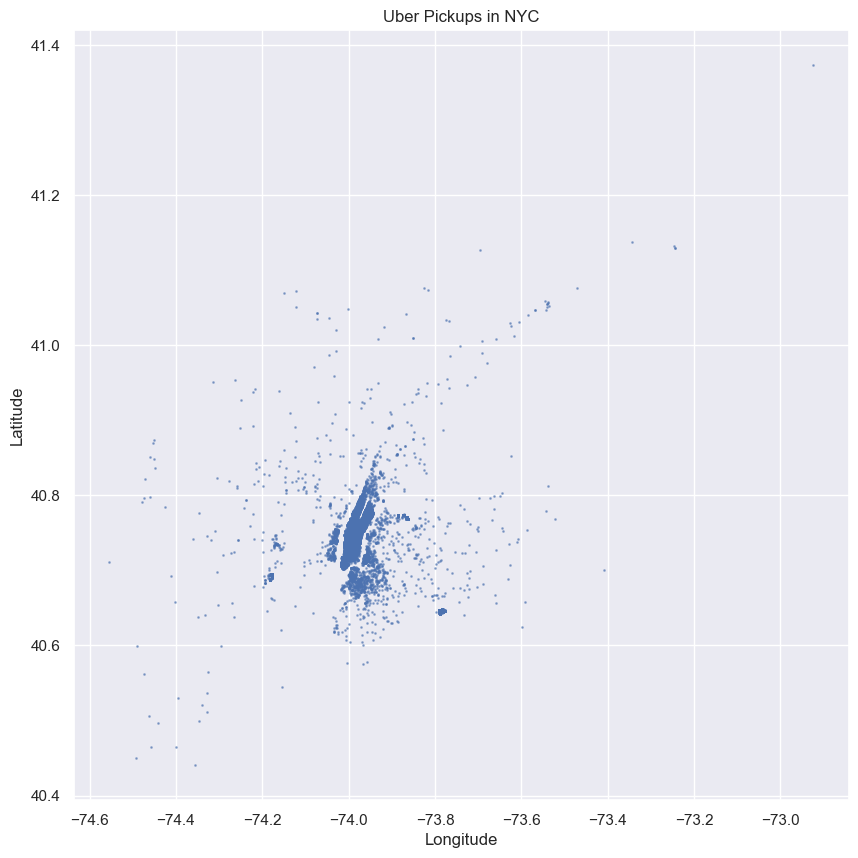

In [258]:
# Mapping Pickup Locations on NYC Map
plt.figure(figsize=(10, 10))
plt.scatter(df_cleaned['Lon'], df_cleaned['Lat'], s=1, alpha=0.5)
plt.title("Uber Pickups in NYC")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

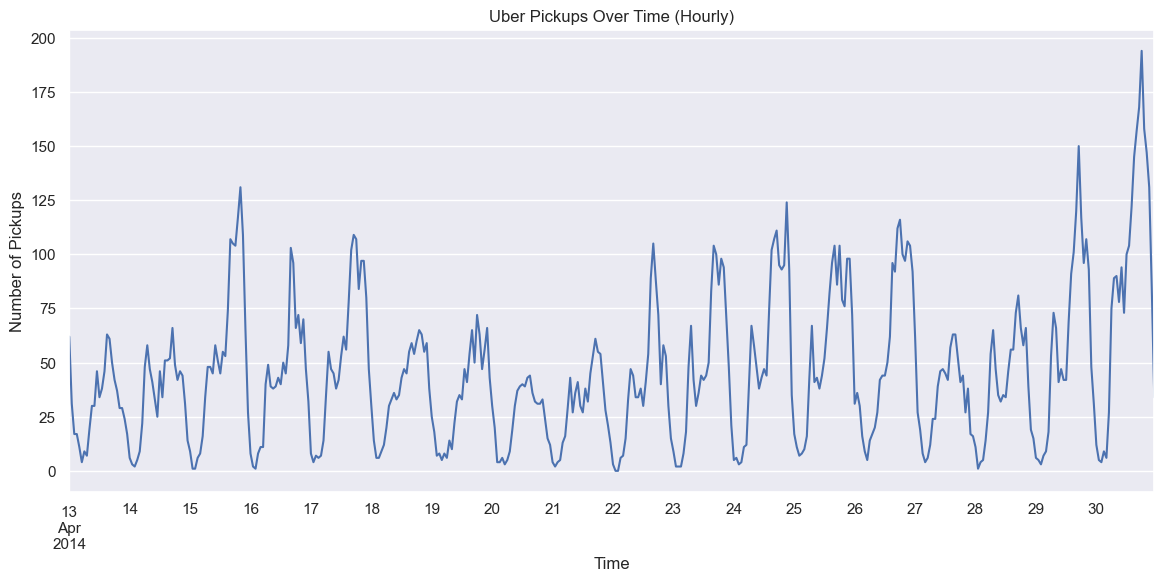

In [259]:
# Line Plot of Pickups Over Time
plt.figure(figsize=(14, 6))
df_cleaned.set_index('Date/Time').resample('h').size().plot()
plt.title("Uber Pickups Over Time (Hourly)")
plt.xlabel("Time")
plt.ylabel("Number of Pickups")
plt.grid(True)
plt.show()

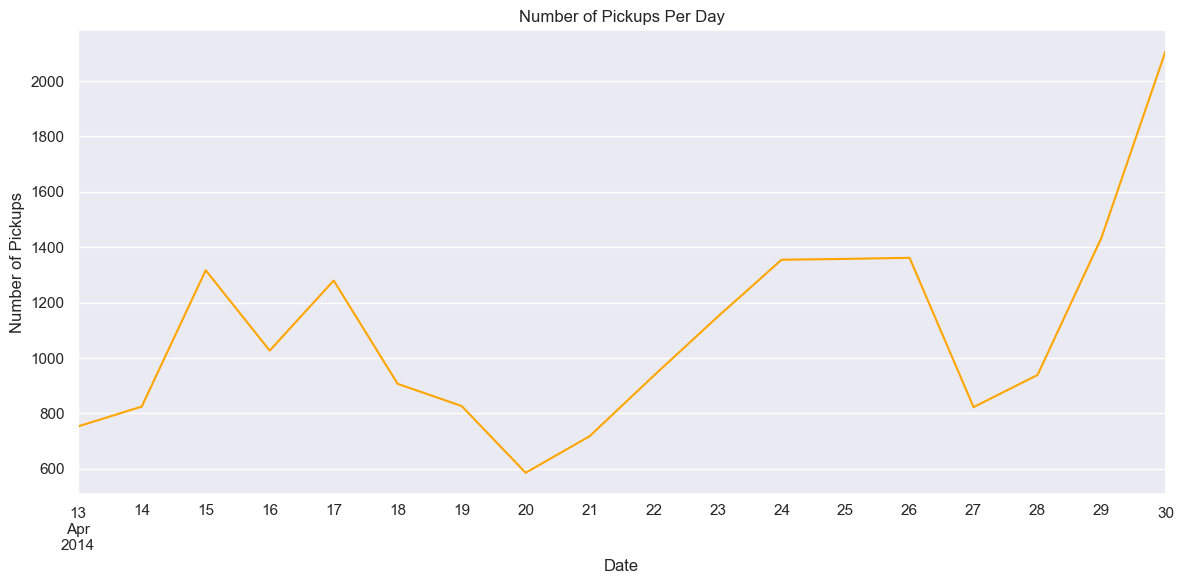

In [260]:
# Line Plot of Pickups Per Day
df_cleaned.set_index('Date/Time').resample('D').size().plot(figsize=(12, 6), color='orange')
plt.title('Number of Pickups Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.show()

In [261]:
df_cleaned.to_csv('uber_data_cleaned.csv', index=False)

In [262]:
print("Cleaned data saved as 'uber_data_cleaned.csv'")

Cleaned data saved as 'uber_data_cleaned.csv'


In [263]:
df_cleaned['Hour'] = df_cleaned['Date/Time'].dt.hour
df_cleaned['Day'] = df_cleaned['Date/Time'].dt.day
df_cleaned['Weekday'] = df_cleaned['Date/Time'].dt.weekday

df_corr = df_cleaned.groupby(['Hour', 'Weekday', 'Base']).size().reset_index(name='Demand')

correlation_matrix = df_corr.corr(numeric_only=True)

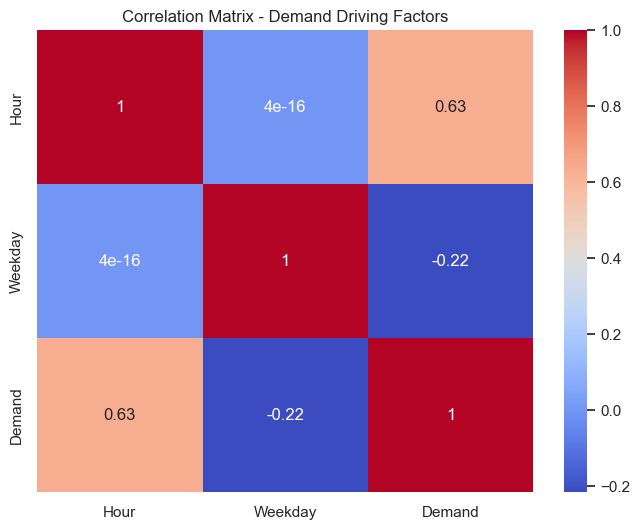

In [300]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Demand Driving Factors')
plt.show()